In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

import image_formats_and_conversions as tools

In [2]:
img = mpimg.imread('moonlanding.png')
grayscale_image = rgb2gray(img)

## Two dimensional Fourier Transform

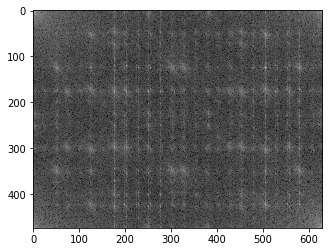

In [3]:
grayscale_image_DFT = np.fft.fft2(grayscale_image)

grayscale_image_DFT_normalized = tools.normalize_fft_image(grayscale_image_DFT)
grayscale_image_DFT_normalized = tools.float_to_uint8(grayscale_image_DFT_normalized)

plt.imshow(grayscale_image_DFT_normalized, cmap="gray")

## Two dimensional inverse Fourier Transform

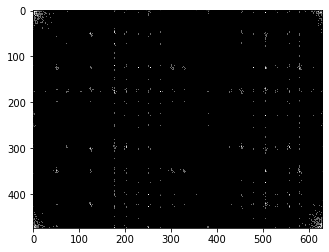

In [4]:
grayscale_image_inverted_DFT = np.fft.ifft2(grayscale_image)

grayscale_image_inverted_DFT_normalized = tools.normalize_fft_image(grayscale_image_inverted_DFT)
grayscale_image_inverted_DFT_normalized = tools.float_to_uint8(grayscale_image_inverted_DFT_normalized)

plt.imshow(100*grayscale_image_inverted_DFT_normalized, cmap="gray")

## Two dimensional centered Fourier Transform

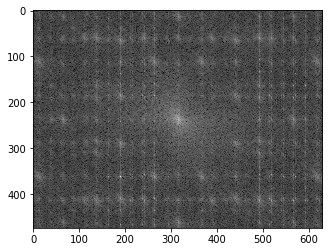

In [5]:
grayscale_image_centered_DFT = np.fft.fftshift(grayscale_image_DFT)

grayscale_image_centered_DFT_normalized = tools.normalize_fft_image(grayscale_image_centered_DFT)
grayscale_image_centered_DFT_normalized = tools.float_to_uint8(grayscale_image_centered_DFT_normalized)

plt.imshow(grayscale_image_centered_DFT_normalized,cmap="gray")

## Ιδεατό Χαμηλοπερατό Φίλτρο
Για να φιλτράρουμε στο πεδίο συχνοτήτων πρέπει να ακολουθήσουμε τα εξής βήματα:
1. Να δημιουργήσουμε μια σφαίρα στο κέντρο της εικόνας με συγκεκριμένη ακτίνα για να κρατήσει συγκεκριμένες συχνότητες.
2. Κάνουμε DFT και μετά DC-DFT στην εικόνα μας.
3. Πολλαπλασιάζουμε την σφαίρα με την DC-DFT εικόνα μας
4. Υπολογίζουμε τον αντίστροφο I-DFT
5. Μετασχηματίζουμε την εικόνα σε εικόνα με απόλυτες τιμές απο 0 έως 1

### 1. Να δημιουργήσουμε μια σφαίρα στο κέντρο της εικόνας με συγκεκριμένη ακτίνα για να κρατήσει συγκεκριμένες συχνότητες.

In [6]:
columns, rows = grayscale_image.shape[:2]

katheta = np.linspace(-127, 128, rows)
orizontia = np.linspace(-127, 128, columns)
katheta

array([-1.27000000e+02, -1.26594595e+02, -1.26189189e+02, -1.25783784e+02,
       -1.25378378e+02, -1.24972973e+02, -1.24567568e+02, -1.24162162e+02,
       -1.23756757e+02, -1.23351351e+02, -1.22945946e+02, -1.22540541e+02,
       -1.22135135e+02, -1.21729730e+02, -1.21324324e+02, -1.20918919e+02,
       -1.20513514e+02, -1.20108108e+02, -1.19702703e+02, -1.19297297e+02,
       -1.18891892e+02, -1.18486486e+02, -1.18081081e+02, -1.17675676e+02,
       -1.17270270e+02, -1.16864865e+02, -1.16459459e+02, -1.16054054e+02,
       -1.15648649e+02, -1.15243243e+02, -1.14837838e+02, -1.14432432e+02,
       -1.14027027e+02, -1.13621622e+02, -1.13216216e+02, -1.12810811e+02,
       -1.12405405e+02, -1.12000000e+02, -1.11594595e+02, -1.11189189e+02,
       -1.10783784e+02, -1.10378378e+02, -1.09972973e+02, -1.09567568e+02,
       -1.09162162e+02, -1.08756757e+02, -1.08351351e+02, -1.07945946e+02,
       -1.07540541e+02, -1.07135135e+02, -1.06729730e+02, -1.06324324e+02,
       -1.05918919e+02, -

In [7]:
x,y = np.meshgrid(katheta, orizontia)
x,y

(array([[-127.        , -126.59459459, -126.18918919, ...,  127.18918919,
          127.59459459,  128.        ],
        [-127.        , -126.59459459, -126.18918919, ...,  127.18918919,
          127.59459459,  128.        ],
        [-127.        , -126.59459459, -126.18918919, ...,  127.18918919,
          127.59459459,  128.        ],
        ...,
        [-127.        , -126.59459459, -126.18918919, ...,  127.18918919,
          127.59459459,  128.        ],
        [-127.        , -126.59459459, -126.18918919, ...,  127.18918919,
          127.59459459,  128.        ],
        [-127.        , -126.59459459, -126.18918919, ...,  127.18918919,
          127.59459459,  128.        ]]),
 array([[-127.        , -127.        , -127.        , ..., -127.        ,
         -127.        , -127.        ],
        [-126.46088795, -126.46088795, -126.46088795, ..., -126.46088795,
         -126.46088795, -126.46088795],
        [-125.9217759 , -125.9217759 , -125.9217759 , ..., -125.9217759 ,

In [8]:
apostasi = np.sqrt(np.power(x,2)+np.power(y,2))
apostasi

array([[179.60512242, 179.31868665, 179.03271061, ..., 179.73894916,
        180.02605525, 180.31361568],
       [179.22431805, 178.9372727 , 178.65068611, ..., 179.35842893,
        179.64614316, 179.93431074],
       [178.84432797, 178.55667175, 178.26947331, ..., 178.97872357,
        179.26704721, 179.5558232 ],
       ...,
       [179.54981815, 179.26329401, 178.97722946, ..., 179.68368608,
        179.97088033, 180.25852878],
       [179.93131455, 179.64539888, 179.35994376, ..., 180.06489887,
        180.35148607, 180.63852844],
       [180.31361568, 180.02830716, 179.74346015, ..., 180.44691698,
        180.73289842, 181.01933598]])

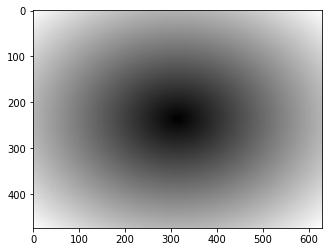

In [9]:
katofli = apostasi < 15
plt.imshow(apostasi, cmap='gray')

### 2. Κάνουμε DFT και μετά DC-DFT στην εικόνα μας.

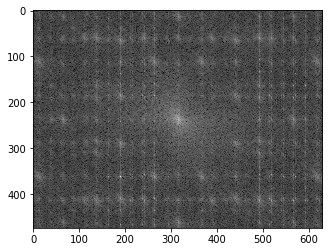

In [10]:
grayscale_image_DFT = np.fft.fft2(grayscale_image)

grayscale_image_centered_DFT = np.fft.fftshift(grayscale_image_DFT)
grayscale_image_centered_DFT_normalized = tools.normalize_fft_image(grayscale_image_centered_DFT)

grayscale_image_centered_DFT_normalized = tools.float_to_uint8(grayscale_image_centered_DFT_normalized)

plt.imshow(grayscale_image_centered_DFT_normalized, cmap='gray')

3. Πολλαπλασιάζουμε την σφαίρα με την DC-DFT εικόνα μας

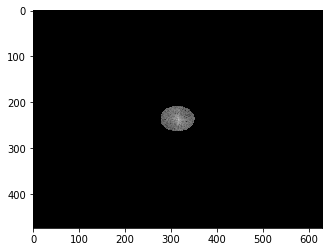

In [11]:
mask_circle = katofli * grayscale_image_centered_DFT
mask_circle_normalized = tools.normalize_fft_image(mask_circle)
mask_circle_final = tools.float_to_uint8(mask_circle_normalized)

plt.imshow(mask_circle_final, cmap='gray')

### 4. Υπολογίζουμε τον αντίστροφο I-DFT

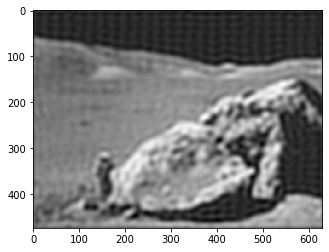

In [12]:
filtered_image = np.fft.ifft2(mask_circle)
grayscale_image_inverted_DFT_normalized = tools.normalize_fft_image(filtered_image)

plt.imshow(grayscale_image_inverted_DFT_normalized, cmap='gray')

### 5. Μετασχηματίζουμε την εικόνα σε εικόνα με απόλυτες τιμές απο 0 έως 1

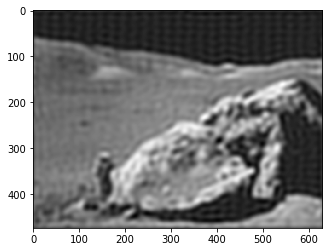

In [13]:
filtered_image_normalized = np.abs(filtered_image)
filtered_image_normalized = tools.float_to_float64(filtered_image_normalized)
plt.imshow(filtered_image_normalized, cmap='gray')

Text(0.5, 1.0, 'Filtered_image')

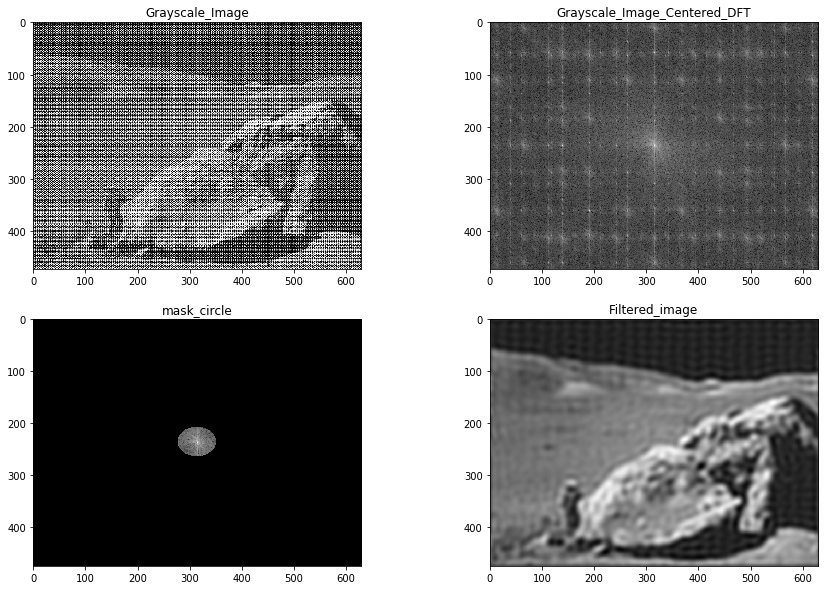

In [14]:
figure1=plt.figure(figsize=(15,10))

subplot1=figure1.add_subplot(2,2,1)
plt.imshow(grayscale_image, cmap="gray")
subplot1.set_title('Grayscale_Image')

subplot1=figure1.add_subplot(2,2,2)
plt.imshow(grayscale_image_centered_DFT_normalized, cmap="gray")
subplot1.set_title('Grayscale_Image_Centered_DFT')

subplot1=figure1.add_subplot(2,2,3)
plt.imshow(mask_circle_normalized, cmap="gray")
subplot1.set_title('mask_circle')

subplot1=figure1.add_subplot(2,2,4)
plt.imshow(filtered_image_normalized, cmap="gray")
subplot1.set_title('Filtered_image')

## Butterworth-χαμηλοπερατά φίλτρα
- Τα ιδεατά χαμηλοπερατά φίλτρα δεν είναι υλοποιήσιμα σε hardware. Επιπλέον δημιουργούν εικόνες με ‘δακτυλίδια’ (ringing effect) εξαιτίας της απότομης μεταβολής μεταβολής της Hideal από την τιμή 1 στη τιμή 0.
- Τα χαμηλοπερατά φίλτρα Butterworth (BLPF) έχουν συνάρτηση μεταφοράς Η της 1 μορφής (n είναι η τάξη του φίλτρου):
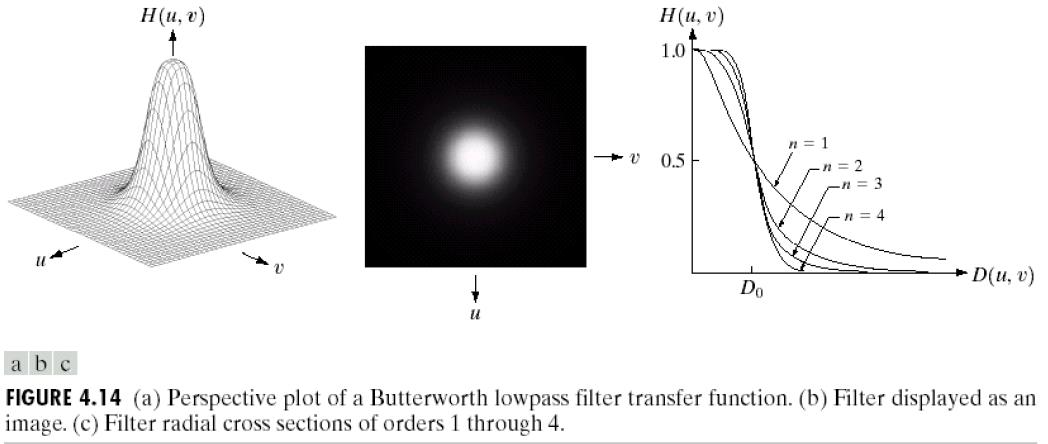

In [15]:
columns=len(grayscale_image)
rows=len(grayscale_image[0])

katheta = np.linspace(-127, 128,rows )
orizontia = np.linspace(-127, 128, columns)

x,y = np.meshgrid(katheta, orizontia)

apostasi=np.sqrt(np.power(x,2)+np.power(y,2))
n=1
base=15
katofli_n_1=1/(1+(np.power(apostasi,2*n)/np.power(base,2*n)))
n=2
base=25
katofli_n_2=1/(1+(np.power(apostasi,2*n)/np.power(base,2*n)))

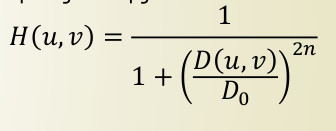

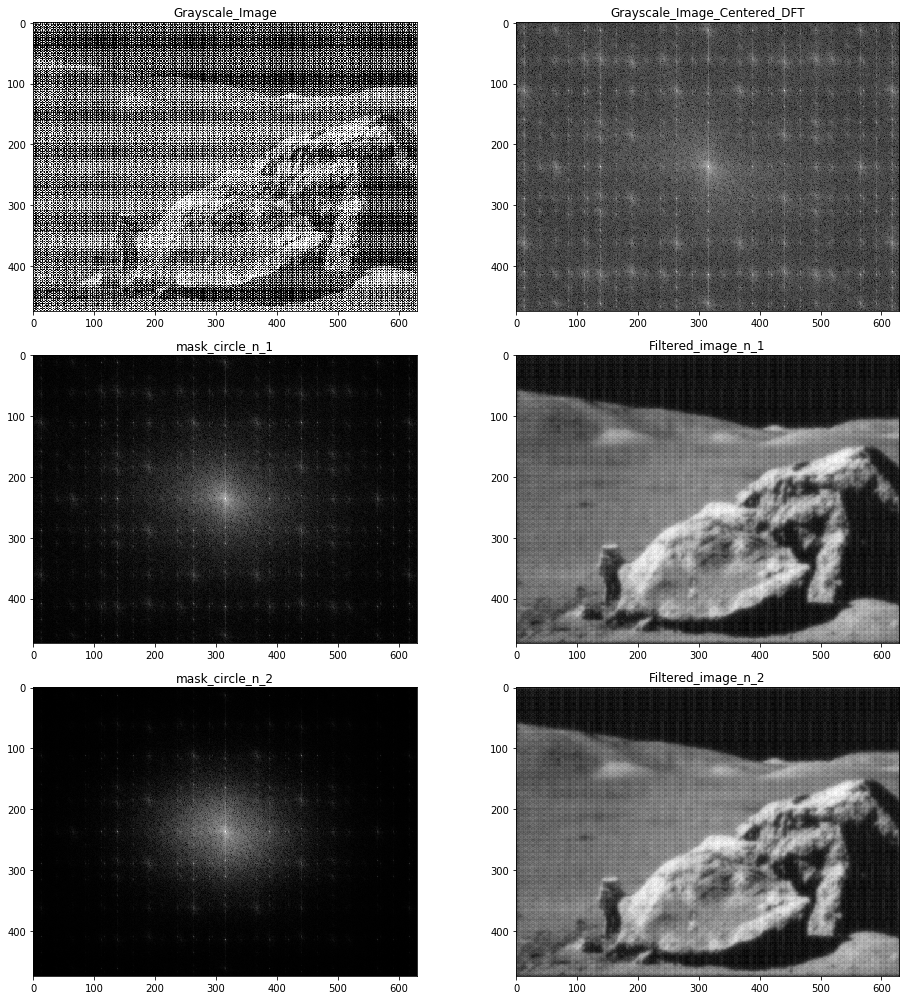

In [16]:
Grayscale_Image_DFT=np.fft.fft2(grayscale_image)
Grayscale_Image_Centered_DFT=np.fft.fftshift(Grayscale_Image_DFT)

Grayscale_Image_Centered_DFT_normalized=np.log(1+np.abs(Grayscale_Image_Centered_DFT))
Grayscale_Image_Centered_DFT_Final=tools.float_to_uint8(Grayscale_Image_Centered_DFT_normalized)

#-----------------------------------------------------------------------------------------------------------

mask_circle_n_1=katofli_n_1*Grayscale_Image_Centered_DFT
mask_circle_normalized_n_1=np.log(1+np.abs(mask_circle_n_1))
mask_circle_final_n_1=tools.float_to_uint8(mask_circle_normalized_n_1)

#------------------------------------------------------------------------------------------------------------
Filtered_image_n_1=np.fft.ifft2(mask_circle_n_1)
Filtered_image_normalized_n_1=np.abs(Filtered_image_n_1)
Filtered_image_final_n_1=tools.float_to_float64(Filtered_image_normalized_n_1)
#------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------

mask_circle_n_2=katofli_n_2*Grayscale_Image_Centered_DFT
mask_circle_normalized_n_2=np.log(1+np.abs(mask_circle_n_2))
mask_circle_final_n_2=tools.float_to_uint8(mask_circle_normalized_n_2)

#------------------------------------------------------------------------------------------------------------
Filtered_image_n_2=np.fft.ifft2(mask_circle_n_2)
Filtered_image_normalized_n_2=np.abs(Filtered_image_n_2)
Filtered_image_final_n_2=tools.float_to_float64(Filtered_image_normalized_n_2)
#------------------------------------------------------------------------------------------------------------


figure1=plt.figure(1, figsize=(14, 14))

subplot1=figure1.add_subplot(3,2,1)
plt.imshow(grayscale_image,cmap="gray")
subplot1.set_title('Grayscale_Image')

subplot1=figure1.add_subplot(3,2,2)
plt.imshow(Grayscale_Image_Centered_DFT_Final,cmap="gray")
subplot1.set_title('Grayscale_Image_Centered_DFT')

subplot1=figure1.add_subplot(3,2,3)
plt.imshow(mask_circle_final_n_1,cmap="gray")
subplot1.set_title('mask_circle_n_1')

subplot1=figure1.add_subplot(3,2,4)
plt.imshow(Filtered_image_final_n_1,cmap="gray")
subplot1.set_title('Filtered_image_n_1')

subplot1=figure1.add_subplot(3,2,5)
plt.imshow(mask_circle_final_n_2,cmap="gray")
subplot1.set_title('mask_circle_n_2')

subplot1=figure1.add_subplot(3,2,6)
plt.imshow(Filtered_image_final_n_1,cmap="gray")
subplot1.set_title('Filtered_image_n_2')

figure1.tight_layout()

## Άσκηση
Διαβαστε την εικονα moonlanding.png. Δημιουργηστε ενα butterworth φιλτρο, υπολογιζοντας τις 4 πρωτες ταξεις του φιλτρου με βαση 15. Εμφανιστε σε ενα subplot τις εικονες αυτες μαζι με την αρχικη εικονα για να δουμε την συγκριση. Στην συνεχεια, αλλαξτε την βαση στην τιμη που πιστευετε οτι ειναι καλυτερο το αποτελεσμα και επαναλαβετε την προηγουμενη διαδικασια. Τελος σε ενα figure εμφανιστε το καθε αποτελεσμα απο τις 4 ταξεις με βαση 15 και τις 4 ταξεις με την βαση που χρησιμοποιησατε. Αποθηκευστε τον κωδικα σας μαζι με τα figure που δημιουργησατε και ανεβαστε το με ονομα DIP_LAB08_AM.zip οπου ΑΜ ο αριθμος μητρωου σας.